In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

## Chapter 4 - Classification

In many situations, the response variable is instead qualitative. For example, eye color is qualitative, taking on values blue, brown, or green. Often qualitative variables are referred to as categorical ; we will use these terms interchangeably. 

In this chapter, we study approaches for predicting qualitative responses, a process that is known as classification. Predicting a qualitative response for an observation can be referred to as classifying that observation, since it involves assigning the observation to a category, or class. 

On the other hand, often the methods used for classification first predict the probability of each of the categories of a qualitative variable, as the basis for making the classification. In this sense they also behave like regression methods.

## Lab: Logistic Regression, LDA, QDA, and KNN

In [7]:
smarket = pd.read_csv('data/smarket.csv')

### Logistic Regression

I couldn't get smf.logit to work properly until I canged the direction column to 1,0 coding.

In [9]:
smarket['Direction'] = np.where(smarket['Direction'] == 'Up', 1, 0)

In [10]:
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=smarket).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1243
Method:                           MLE   Df Model:                            6
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.002074
Time:                        15:42:46   Log-Likelihood:                -863.79
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7319
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1260      0.241     -0.523      0.601        -0.598     0.346
Lag1          -0.0731      0.050     -1.457      0.145        -0.171     0.025
Lag2          -0.0423      0.050     -0.845      0.398        -0.140     0.056
Lag3           0.0111      0.050      0.222      0.824        -0.087     0.109
Lag4           0.0094      0.050      0.187      0.851        -0.089     0.107
Lag5           0.0103      0.050      0.208      0.835        -0.087     0.107
Volume         0.1354      0.158      0.855      0.392        -0.175     0.446
==============================================================================
"""

Te smallest p-value here is associated with Lag1}. 

The negative coefficient for this predictor suggests that if the market had a positive return yesterday, then it is less likely to go up today. However, at a value of 0.145, the p-value is still relatively large, and so there is no clear evidence of a real association between Lag1 and Direction.

In [13]:
print("Coeffieients\n ", results.params)
print('')

print("p-Values\n", results.pvalues)
print('')

print("Dependent variables\n", results.model.endog_names)

Coeffieients
  Intercept   -0.126000
Lag1        -0.073074
Lag2        -0.042301
Lag3         0.011085
Lag4         0.009359
Lag5         0.010313
Volume       0.135441
dtype: float64

p-Values
 Intercept    0.600700
Lag1         0.145232
Lag2         0.398352
Lag3         0.824334
Lag4         0.851445
Lag5         0.834998
Volume       0.392404
dtype: float64

Dependent variables
 Direction


In [15]:
#predictions
results.fittedvalues[:10]

0    0.028338
1   -0.074162
2   -0.075480
3    0.060908
4    0.043131
5    0.027828
6   -0.029399
7    0.036921
8    0.070483
9   -0.044656
dtype: float64

We have printed the first ten probabilities. These values correspond to the probability of the market going down. Let's code the predictions to match our Direction columns;

In [16]:
pred = np.where(results.predict(smarket) > .5, 1, 0)

In [17]:
pred

array([1, 0, 0, ..., 1, 1, 1])

In [20]:
confusion_matrix(smarket["Direction"], pred)

array([[145, 457],
       [141, 507]])

The diagonal elements of the confusion matrix indicate correct predictions, while the off-diagonals represent incorrect predictions.

In [23]:
training = smarket[smarket['Year'] < 2005]
test = smarket[smarket['Year'] >= 2005]

In [24]:
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=training).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691936
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  998
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            6
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.001562
Time:                        15:49:23   Log-Likelihood:                -690.55
converged:                       True   LL-Null:                       -691.63
                                        LLR p-value:                    0.9044
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1912      0.334      0.573      0.567        -0.463     0.845
Lag1          -0.0542      0.052     -1.046      0.295        -0.156     0.047
Lag2          -0.0458      0.052     -0.884      0.377        -0.147     0.056
Lag3           0.0072      0.052      0.139      0.889        -0.094     0.108
Lag4           0.0064      0.052      0.125      0.901        -0.095     0.108
Lag5          -0.0042      0.051     -0.083      0.934        -0.104     0.096
Volume        -0.1163      0.240     -0.485      0.628        -0.586     0.353
==============================================================================
"""

In [29]:
pred = np.where(results.predict(test) > .5, 1, 0)

In [30]:
confusion_matrix(test["Direction"], pred)

array([[77, 34],
       [97, 44]])

### LDA

Google helped me find more information on using the LDA from SciKit Learn than statsmodels, so I'll use that.

In [67]:
X_train = training[training.columns[:-1]].values
y_train = training['Direction']

X_test = test[test.columns[:-1]].values
y_test = test['Direction']

In [68]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pred = np.where(lda.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[100,  11],
       [  1, 140]])

### QDA

In [69]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
pred = np.where(qda.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[101,  10],
       [ 12, 129]])

### KNN

In [70]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = np.where(knn.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[ 92,  19],
       [ 22, 119]])

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = np.where(knn.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[ 92,  19],
       [ 21, 120]])

### KNN w/ caravan Data

Need to code the purchase column.

In [73]:
caravan = pd.read_csv('data/caravan.csv')

In [82]:
caravan['Purchase'] = np.where(caravan['Purchase'] == 'Yes', 1, 0)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(caravan[caravan.columns[:-1]].values, 
                                                    caravan['Purchase'].values, random_state=42)

In [84]:
from sklearn import preprocessing

In [85]:
X_train = preprocessing.scale(X_train)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [86]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = np.where(knn.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[1298,   53],
       [  99,    6]])

In [87]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = np.where(knn.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[1342,    9],
       [ 104,    1]])

In [88]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred = np.where(knn.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[1345,    6],
       [ 105,    0]])

In [89]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = np.where(lr.predict(X_test) > .5, 1, 0)
confusion_matrix(y_test, pred)

array([[ 182, 1169],
       [   9,   96]])

## Exercises
### Conceptual

**1.** Turn equation 4.2 to 4.3

4.2 $p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}}$

4.3 $\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1X}$
From 4.2;

$p(x) = \frac{e^{\beta_0 + \beta_1X}}{1 + e^{\beta_0 + \beta_1X}} = (1 + e^{\beta_0 + \beta_1X})p(x) = e^{\beta_0 + \beta_1X}$

Distribute on the left side;

$p(x) + e^{\beta_0 + \beta_1X}p(x) = e^{\beta_0 + \beta_1X}$

Use substitution from 4.3;

$p(x) + \frac{p(x)p(x)}{1-p(x)} = e^{\beta_0 + \beta_1X}$

Change the denominator of the first $p(x)$ to match;

$\frac{(1-p(x))p(x)}{1-p(x)} + \frac{p(x)p(x)}{1-p(x)} = e^{\beta_0 + \beta_1X}$

Distribute and combine;


$\frac{p(x) - p(x)p(x) + p(x)p(x)}{1-p(x)} = e^{\beta_0 + \beta_1X}$

Cancel out the $- p(x)p(x) + p(x)p(x)$;

$\frac{p(x)}{1 - p(x)} = e^{\beta_0 + \beta_1X}$

**2.** It was stated in the text that classifying an observation to the class for which (4.12) is largest is equivalent to classifying an observation to the class for which (4.13) is largest. Prove that this is the case.

> Latex became too time consuming, done on paper;

**3.** When working through exercie 2, we end up taking the log of (4.12), ignoring the contant terms that do not vary with, we end up with;

$log(p_k(x)) = (- \frac {1} {2 \sigma_k^2} (x^2 + \mu_k^2 - 2x\mu_k)) + log(\pi_k) - log(\sigma_k)$

We can clearly see this equation contains an $x^2$ term.

**4a.** $\frac{0.65-0.55}{1-0} = 0.1$, which is 10%.

**4b.** With two features this becomes $0.1 \times 0.1 = 0.01$, aka 1%

**4c.** With 100 features; $.01^{100}$

**4d.** As we add features (for a set sample size) we decrease the number of neighbors used for predictions. As $p$ grows, the number of neighbors used actually approaches 0.
  
**4e.** Each side will be of length $.1^{1/p}$;
$p=1$, $s=0.1$
$p=2$, $s=0.1^{\frac{1}{2}}=0.3162$
$p=100$, $s=0.1^{\frac{1}{100}}=0.9772$

As the we have more features, if we want to use 10% of the training observations each time, then eventually we are using the whole range of each feature.

**5a.** QDA has a higher flexibility, so it should perform better on the training set, but LDA should perform better on the test set if the Bayes decision boundary is linear.

**5b.** QDA should perform better on both.

**5c.** As we add observations QDA should improve faster than LDA as it is a more flexible model and with more observations will becomes less prone to overfitting.

**5d.** False, if there are not enough data points, the variance of QDA may cause overfiting, which would lead to a worse test error rate.

**6a.** 0.3775

**6b.** 50

**7.** We can just plug in the parameters and $X$ values in to the equation for $p_k(x)$;

The probability that a company will issue a dividend this year is 72.5%.

**8.** With $K=1$ the KNN model will always choose the training observation as it's own predictor, giving it an actual training error of 0%, which means the test error is actually 36%, which is worse than the 30% given by the logistic regression.

**9a.** 27% of these people will default on their credit card payment.

**9b.** The odds she will default are 0.19.

### Applied

**10a.** Produce some numerical and graphical summaries of the “Weekly” data. Do there appear to be any patterns?

In [3]:
weekly = pd.read_csv("data/weekly.csv")
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


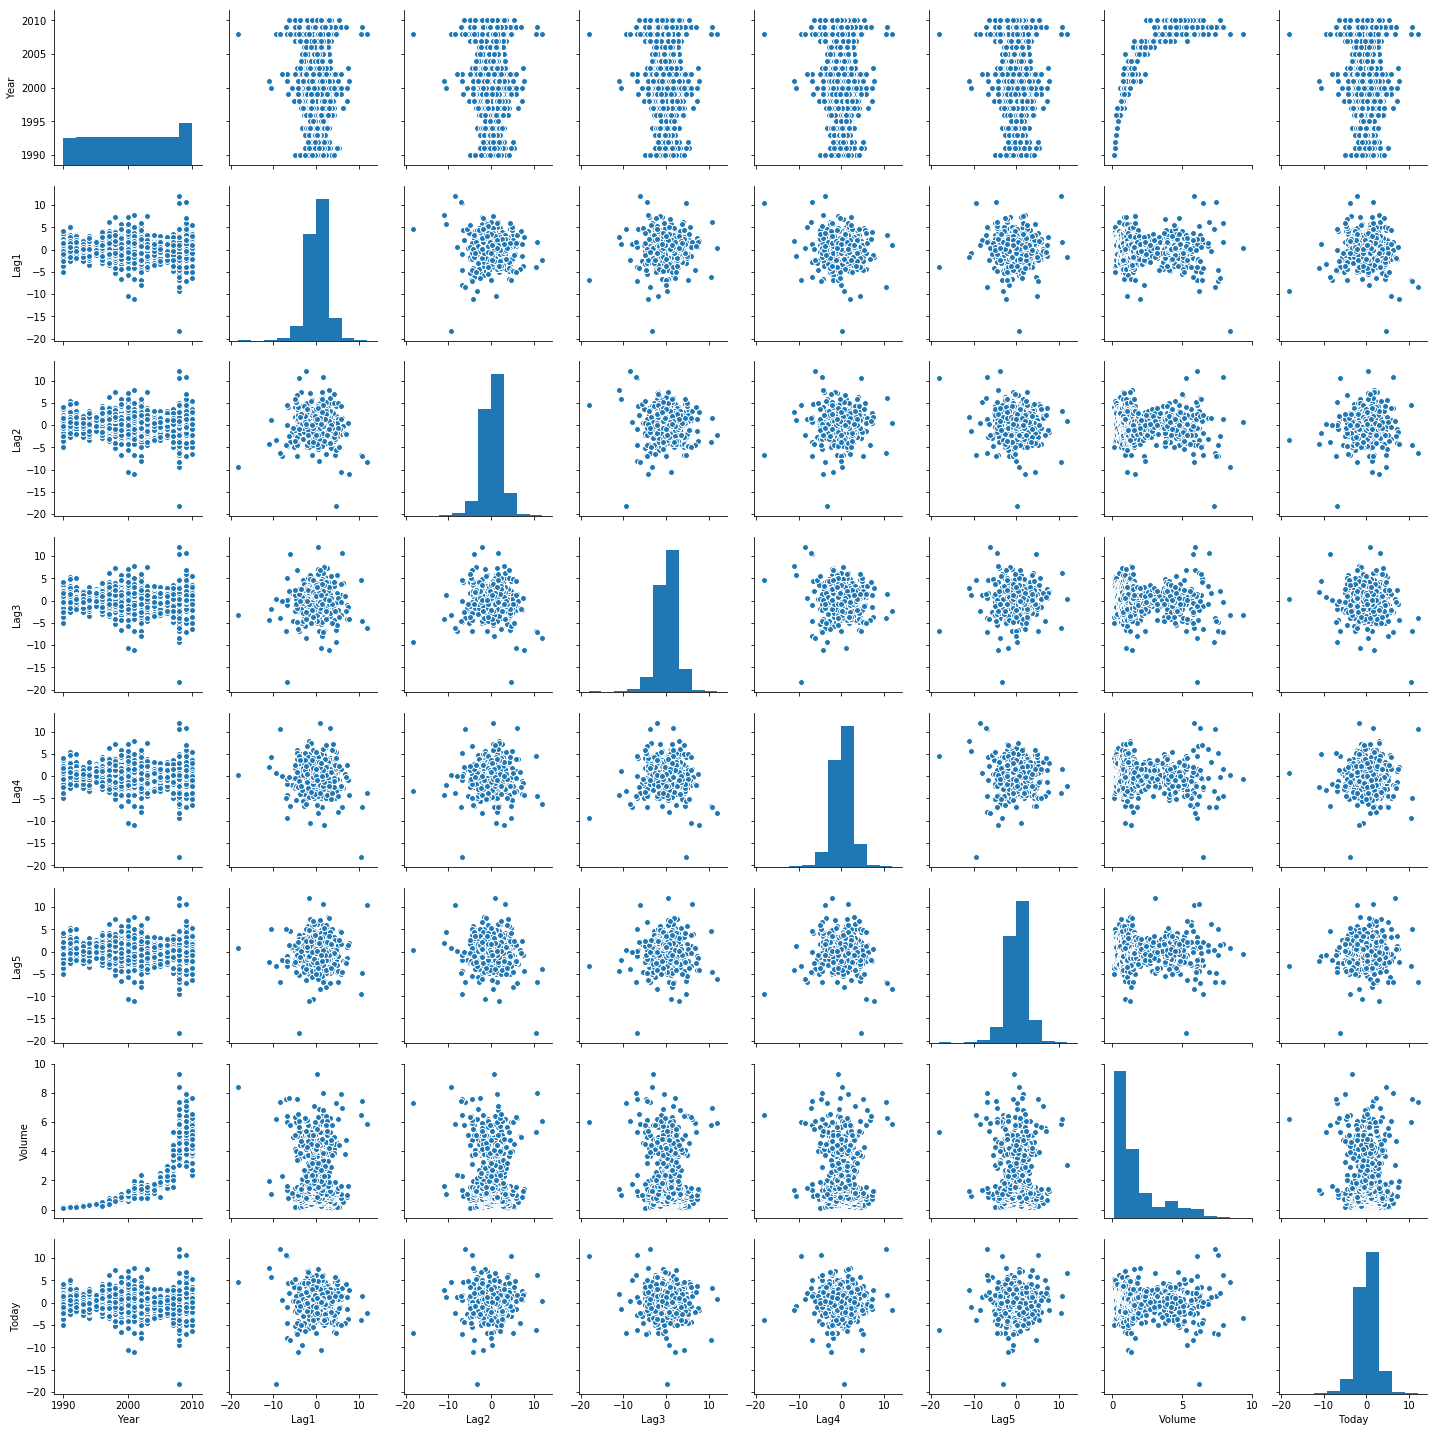

In [6]:
sns.pairplot(weekly)

In [5]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


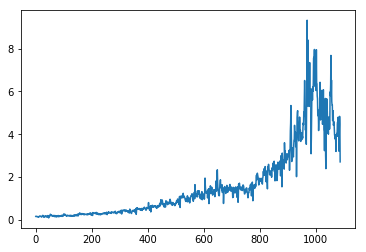

In [8]:
plt.plot(weekly.Volume);

There doesn't seem to be much correlation between the lag variables and today's returns. There is a subtantial correlation between year and volumne, we can see volume is increasing over time.

**10b.** Use the full data set to perform a logistic regression with “Direction” as the response and the five lag variables plus “Volume” as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [19]:
weekly['Direction'] = np.where(weekly['Direction'] == 'Up', 1, 0)

In [20]:
results = smf.logit('Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume', data=weekly).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.006580
Time:                        14:32:23   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002         0.098     0.435
Lag1          -0.0413      0.026     -1.563      0.118        -0.093     0.010
Lag2           0.0584      0.027      2.175      0.030         0.006     0.111
Lag3          -0.0161      0.027     -0.602      0.547        -0.068     0.036
Lag4          -0.0278      0.026     -1.050      0.294        -0.080     0.024
Lag5          -0.0145      0.026     -0.549      0.583        -0.066     0.037
Volume        -0.0227      0.037     -0.616      0.538        -0.095     0.050
==============================================================================
"""

Lag2 seems to the only statistically signifigant variable.

**10c.** Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [26]:
pred = np.where(results.predict(weekly) > .5, 1, 0)

In [27]:
confusion_matrix(weekly['Direction'], pred)

array([[ 54, 430],
       [ 48, 557]])

In [28]:
(54+557)/1089

0.5610651974288338

In [109]:
weekly['Direction'].mean()

0.5555555555555556

The training error rate is 43.89%. The model defaults to predicting Up.

**10d.** Now fit the logistic regression model using a training data period from 1990 to 2008, with “Lag2” as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 to 2010).

In [29]:
training = weekly[weekly['Year'] < 2009]
test = weekly[weekly['Year'] >= 2009]

In [30]:
results = smf.logit('Direction ~ Lag2', data=training).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                  985
Model:                          Logit   Df Residuals:                      983
Method:                           MLE   Df Model:                            1
Date:                Thu, 03 May 2018   Pseudo R-squ.:                0.003076
Time:                        14:45:21   Log-Likelihood:                -675.27
converged:                       True   LL-Null:                       -677.35
                                        LLR p-value:                   0.04123
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2033      0.064      3.162      0.002         0.077     0.329
Lag2           0.0581      0.029      2.024      0.043         0.002     0.114
==============================================================================
"""

In [35]:
test.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
985,2009,6.760,-1.698,0.926,0.418,-2.251,3.793110,-4.448,0
986,2009,-4.448,6.760,-1.698,0.926,0.418,5.043904,-4.518,0
987,2009,-4.518,-4.448,6.760,-1.698,0.926,5.948758,-2.137,0
988,2009,-2.137,-4.518,-4.448,6.760,-1.698,6.129763,-0.730,0
989,2009,-0.730,-2.137,-4.518,-4.448,6.760,5.602004,5.173,1


In [44]:
pred = np.where(results.predict(exog=dict(Lag2=test['Lag2'])) > .5, 1, 0)

In [46]:
confusion_matrix(test['Direction'], pred)

array([[ 9, 34],
       [ 5, 56]])

The test error rate for this model is 37.5%.

**10e.** Repeat (d) using LDA.

In [51]:
X_train = training['Lag2'].values.reshape(-1,1)
y_train = training['Direction']

X_test = test['Lag2'].values.reshape(-1,1)
y_test = test['Direction']

In [52]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
confusion_matrix(y_test, lda.predict(X_test))

array([[ 9, 34],
       [ 5, 56]])

Hrm, this matches the logistic regression results from statsmodel's logit.

**10f.** Repeat (d) using QDA

In [54]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

array([[ 0, 43],
       [ 0, 61]])

QDA only predicted up,so for weeks where the market does go up, the model is right 100% of the time, but that also means that for weeks when the market went down, it was right 0% of the time!

**10g.** Repeat (d) using KNN with K=1.

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
confusion_matrix(y_test, knn.predict(X_test))

array([[21, 22],
       [30, 31]])

KNN worked exactly as well as flipping a coin might have.

**10h.** Which of these methods appears to provide the best results on this data ?

> Logistic regression and LDA both have the lowest error rates and seem to fit the data best.

**11a.** Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.

In [57]:
auto = pd.read_csv('data/auto.csv')

In [58]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(), 1, 0)

**10b.** Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predictiong mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

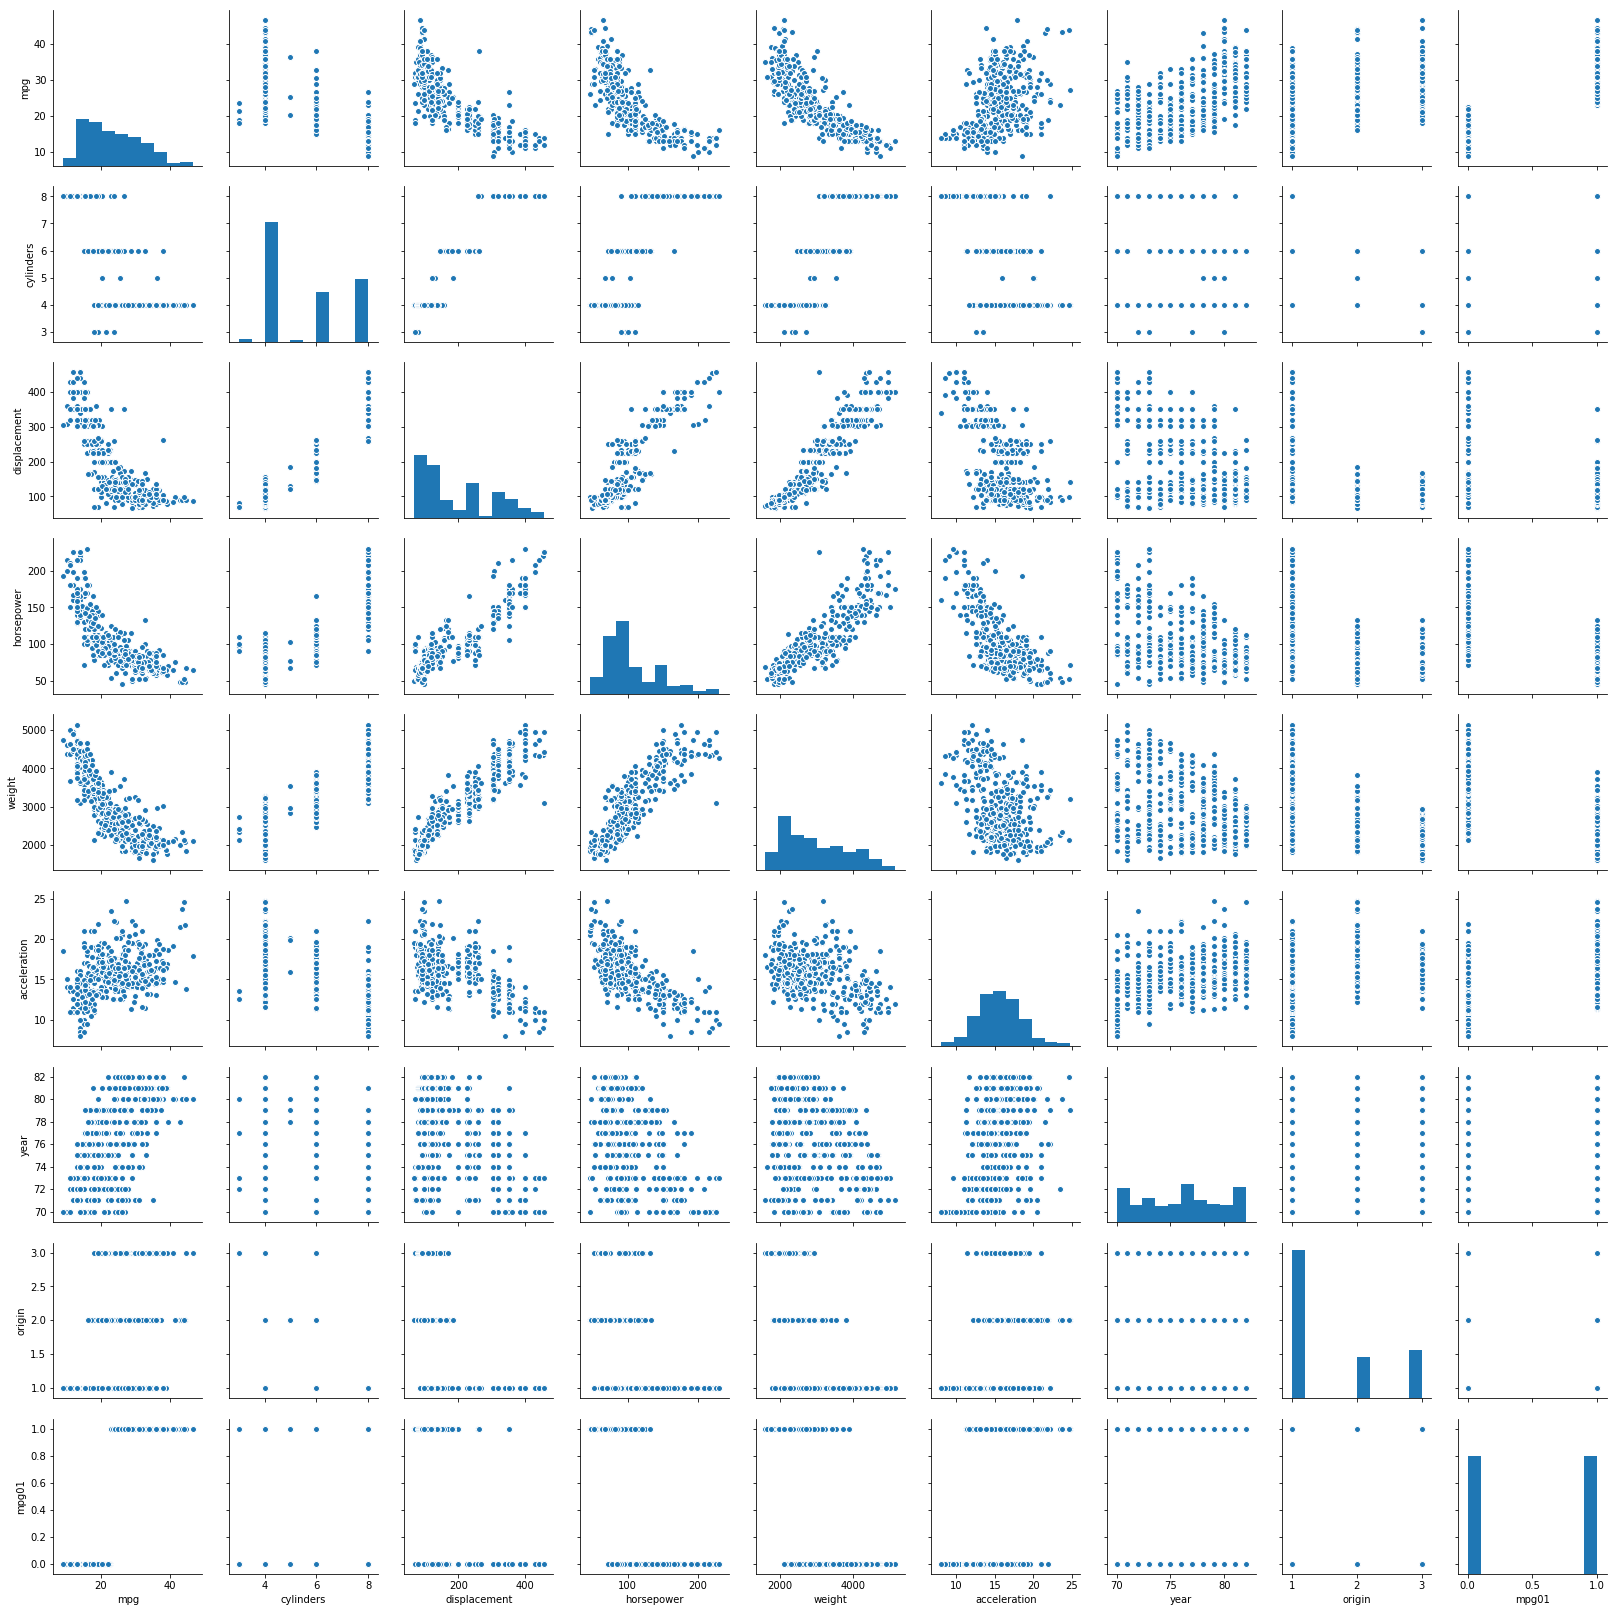

In [59]:
sns.pairplot(auto);

In [60]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


It looks like there exists some relationship between mpg01 and cylinders, weight, displacement and horsepower, which we would expect as we saw them relate to mpg in the previous chapter.

**11c.** Split the data into a training set and a test set.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(auto[auto.columns[1:-1]].values, 
                                                    auto['mpg01'].values, random_state=42)

**11d.** Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained ?

Learning now that I need to decide on feature before splitting the data, I think.

In [73]:
features = ['cylinders', 'weight', 'displacement', 'horsepower']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(auto[features].values, 
                                                    auto['mpg01'].values, random_state=42)

In [75]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train);

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [76]:
confusion_matrix(y_test, lda.predict(X_test))

array([[45,  9],
       [ 2, 42]])

In [79]:
accuracy_score(y_test, lda.predict(X_test))

0.8877551020408163

So, we have test error rate of 12.637%.

**11e.** Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained ?

In [81]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

array([[45,  9],
       [ 3, 41]])

In [82]:
accuracy_score(y_test, qda.predict(X_test))

0.8775510204081632

The test error rate is 13.186%, which is slightly worse than the LDA results.

**11f.** Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with “mpg01” in (b). What is the test error of the model obtained ?

In [83]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
confusion_matrix(y_test, qda.predict(X_test))

array([[45,  9],
       [ 3, 41]])

In [84]:
accuracy_score(y_test, lr.predict(X_test))

0.8469387755102041

Logisitc Regression produces the lowest error rate yet at 12.087%

**11g.** Perform KNN on the training data, with several values of K, in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set ?

In [86]:
k_errors = {}
for k in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    error_rate = 1 - accuracy_score(y_test, knn.predict(X_test))
    k_errors[k] = error_rate

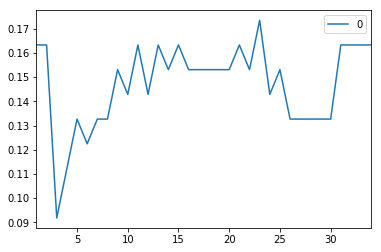

In [92]:
pd.DataFrame.from_dict(k_errors, orient='index').plot();

**12.** Problem involves writing functions in R.

**13.** Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. 

Explore the logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings.

In [93]:
boston = pd.read_csv('data/boston.csv')
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1, 0)

In [94]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


It looks like chas is the only variable correlated with other predictors, so I am going to include them all in our models.

In [96]:
features = boston.columns[1:-1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(boston[features].values, 
                                                    boston['crim01']
                                                    , random_state=42)

In [100]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train);

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train);

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariances=False, tol=0.0001)

In [102]:
print('Logistic Regression Error Rate: ', 1-accuracy_score(y_test, lr.predict(X_test)))
print('')

print('LDA Error Rate: ', 1-accuracy_score(y_test, lda.predict(X_test)))
print('')

print('QDA Regression Error Rate: ', 1-accuracy_score(y_test, qda.predict(X_test)))

Logistic Regression Error Rate:  0.16535433070866146

LDA Error Rate:  0.16535433070866146

QDA Regression Error Rate:  0.11811023622047245


In [104]:
k_errors = {}
for k in range(1, 35):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    error_rate = 1 - accuracy_score(y_test, knn.predict(X_test))
    k_errors[k] = error_rate

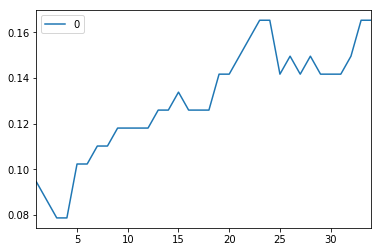

In [106]:
pd.DataFrame.from_dict(k_errors, orient='index').plot();